Library yang digunakan

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from mpl_toolkits.mplot3d import Axes3D

Loading Dataset

In [119]:
# Membaca dataset CSV
df = pd.read_csv('../data/SVMtrain.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [120]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [121]:
# Menampilkan statistik deskriptif dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [122]:
# Cek nilai pada kolom 'Survived'
df['Survived'].unique()

array([0, 1])

In [123]:
# Menghitung jumlah nilai pada kolom 'Survived'
df['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

Pemilihan Feature

In [124]:
# Mengubah nama kolom
df = df.rename(columns={
    'PassengerId' : 'id_penumpang',
    'Pclass' : 'kelas',
    'Sex' : 'gender',
    'Age' : 'umur',
    'SibSp' : 'saudara',
    'Parch' : 'orang_tua',
    'Fare' : 'tarif',
    'Embarked' : 'berangkat',
    'Survived' : 'selamat'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_penumpang  889 non-null    int64  
 1   selamat       889 non-null    int64  
 2   kelas         889 non-null    int64  
 3   gender        889 non-null    object 
 4   umur          889 non-null    float64
 5   saudara       889 non-null    int64  
 6   orang_tua     889 non-null    int64  
 7   tarif         889 non-null    float64
 8   berangkat     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [125]:
# Mapping nilai pada kolom 'jenis_kelamin'
df['jenis_kelamin'] = (df['gender'] == 'Male').astype(int)

In [126]:
# Feature Selection 
X = df[['kelas', 'jenis_kelamin', 'umur', 'saudara', 'orang_tua', 'tarif','berangkat']]

# Target Variable
y = df['selamat']

In [127]:
X.head()

,kelas,jenis_kelamin,umur,saudara,orang_tua,tarif,berangkat
0,3,1,22.0,1,0,7.2500,3
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,3
3,1,0,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [128]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: selamat, dtype: int64

Split dan Bangun Model SVM

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
# Membangun model SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Evaluasi Akurasi dan Report Klasifikasi

In [130]:
y_pred = model.predict(X_test)
# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%")
# Laporan Klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 79.78%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



Confusion Matrix


Confusion Matrix: 
 [[89 20]
 [16 53]]


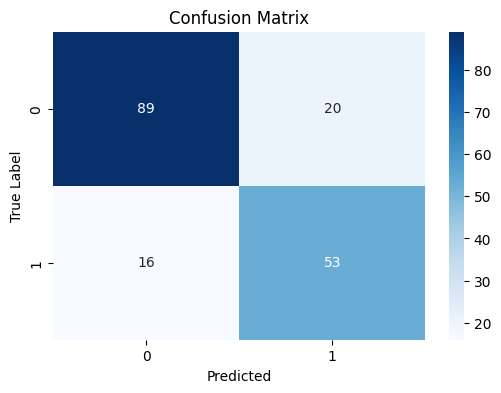

In [131]:
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

# Buat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()

Visualisasi Hasil Model SVM

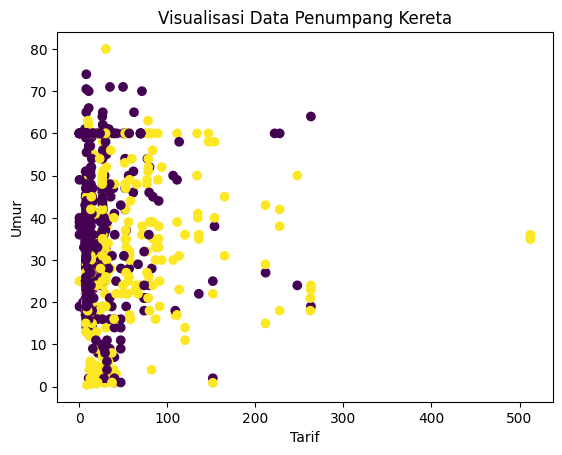

In [134]:
plt.scatter(df['tarif'], df['umur'], c=df['selamat'].astype('category').cat.codes)
plt.xlabel('Tarif')
plt.ylabel('Umur')
plt.title('Visualisasi Data Penumpang Kereta')
plt.show()

3D Visualisasi Hasil Model SVM

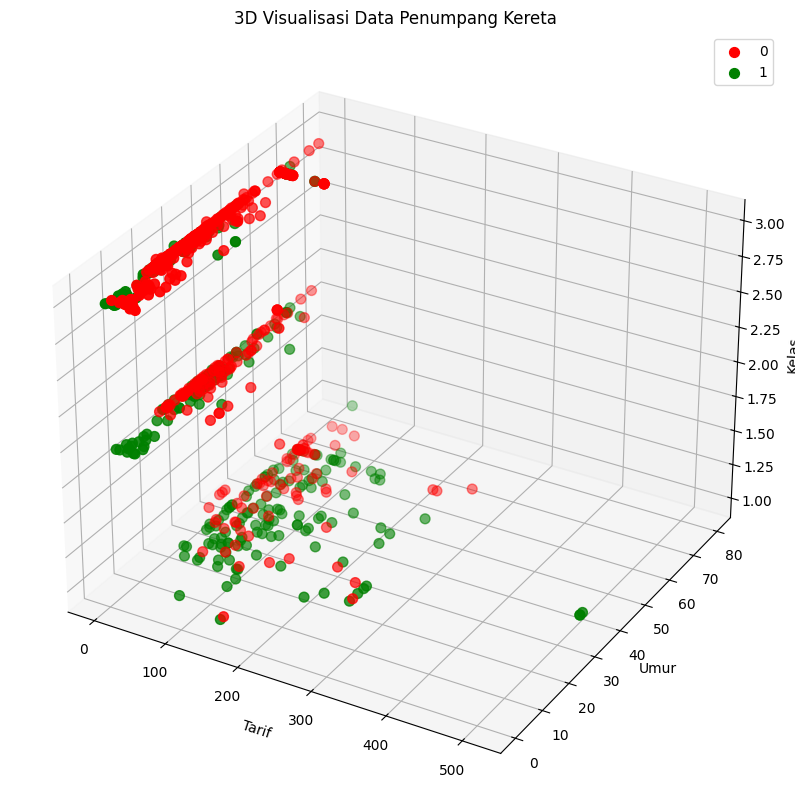

In [135]:
# Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['selamat_encoded'] = le.fit_transform(df['selamat'])

# Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# warna untuk setiap kelas
colors = ['r', 'g', 'b']
label = le.classes_

# Plot tiap selamat dengan warna berbeda
for i, selamat in enumerate(label):
    subset = df[df['selamat'] == i]
    ax.scatter(
        subset['tarif'],
        subset['umur'],
        subset['kelas'],
        c=colors[i],
        label=label[i],
        s=50
    )

ax.set_xlabel('Tarif')
ax.set_ylabel('Umur')
ax.set_zlabel('Kelas')
ax.set_title('3D Visualisasi Data Penumpang Kereta')
ax.legend()
plt.show()